In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [66]:
### Import data set
file_path = "./data/"

bikesharing = pd.read_csv(f"{file_path}chicago_2017_prepared.csv", parse_dates=["start_time", "end_time"])

In [67]:
### Dropping all rows not equal "Customers" and "Subscriber"
bikesharing = bikesharing.drop(bikesharing[(bikesharing["user_type"] != "Customer") & (bikesharing["user_type"] != "Subscriber")].index)
bikesharing.head()

start_time            end_time  start_station_id  end_station_id  \
0 2017-01-01 00:00:36 2017-01-01 00:06:32               414             191   
1 2017-01-01 00:02:54 2017-01-01 00:08:21                28              20   
2 2017-01-01 00:06:06 2017-01-01 00:18:31               620             333   
3 2017-01-01 00:07:28 2017-01-01 00:12:51               287              68   
4 2017-01-01 00:07:57 2017-01-01 00:20:53               300             118   

                     start_station_name              end_station_name  \
0                  Canal St & Taylor St      Canal St & Monroe St (*)   
1            Larrabee St & Menomonee St  Sheffield Ave & Kingsbury St   
2  Orleans St & Chestnut St (NEXT Apts)    Ashland Ave & Blackhawk St   
3               Franklin St & Monroe St        Clinton St & Tilden St   
4                  Broadway & Barry Ave       Sedgwick St & North Ave   

   bike_id   user_type  start_hour  start_day  start_month  start_weekday  \
0     2511    Customer           0          1            1              6   
1     3660  Subscriber           0          1            1              6   
2     4992  Subscriber           0          1            1              6   
3     5637  Subscriber           0          1            1              6   
4     2209  Subscriber           0          1            1              6   

   max_temp  min_temp  precip  start_lat  start_long    end_lat   end_long  
0      -0.6      -0.6     0.0  41.870257  -87.639474  41.880884 -87.639525  
1      -0.6      -0.6     0.0  41.914680  -87.643320  41.910522 -87.653106  
2      -0.6      -0.6     0.0  41.898203  -87.637536  41.907066 -87.667252  
3      -0.6      -0.6     0.0  41.880317  -87.635185  41.875885 -87.640795  
4      -0.6      -0.6     0.0  41.937725  -87.644095  41.911386 -87.638677

In [68]:
### Add column 'Day of year' extracted from 'start time'
bikesharing['day_of_year'] = bikesharing['start_time'].dt.dayofyear

### Calculate and add column trip duration in seconds
bikesharing['duration'] = bikesharing["end_time"] - bikesharing["start_time"]
def get_seconds(x):
    return x.seconds
bikesharing["duration"] = bikesharing["duration"].apply(lambda x: get_seconds(x))

In [69]:
bikesharing.head()

start_time            end_time  start_station_id  end_station_id  \
0 2017-01-01 00:00:36 2017-01-01 00:06:32               414             191   
1 2017-01-01 00:02:54 2017-01-01 00:08:21                28              20   
2 2017-01-01 00:06:06 2017-01-01 00:18:31               620             333   
3 2017-01-01 00:07:28 2017-01-01 00:12:51               287              68   
4 2017-01-01 00:07:57 2017-01-01 00:20:53               300             118   

                     start_station_name              end_station_name  \
0                  Canal St & Taylor St      Canal St & Monroe St (*)   
1            Larrabee St & Menomonee St  Sheffield Ave & Kingsbury St   
2  Orleans St & Chestnut St (NEXT Apts)    Ashland Ave & Blackhawk St   
3               Franklin St & Monroe St        Clinton St & Tilden St   
4                  Broadway & Barry Ave       Sedgwick St & North Ave   

   bike_id   user_type  start_hour  start_day  ...  start_weekday  max_temp  \
0     2511    Customer           0          1  ...              6      -0.6   
1     3660  Subscriber           0          1  ...              6      -0.6   
2     4992  Subscriber           0          1  ...              6      -0.6   
3     5637  Subscriber           0          1  ...              6      -0.6   
4     2209  Subscriber           0          1  ...              6      -0.6   

   min_temp  precip  start_lat  start_long    end_lat   end_long  day_of_year  \
0      -0.6     0.0  41.870257  -87.639474  41.880884 -87.639525            1   
1      -0.6     0.0  41.914680  -87.643320  41.910522 -87.653106            1   
2      -0.6     0.0  41.898203  -87.637536  41.907066 -87.667252            1   
3      -0.6     0.0  41.880317  -87.635185  41.875885 -87.640795            1   
4      -0.6     0.0  41.937725  -87.644095  41.911386 -87.638677            1   

   duration  
0       356  
1       327  
2       745  
3       323  
4       776  

[5 rows x 21 columns]

In [70]:
### Selecting features relevant for clustering
bikesharing_relevant = bikesharing[["user_type", "start_hour", "start_weekday", "min_temp", "precip", "duration", "start_lat", "start_long"]]
bikesharing_relevant

user_type  start_hour  start_weekday  min_temp  precip  duration  \
0          Customer           0              6      -0.6     0.0       356   
1        Subscriber           0              6      -0.6     0.0       327   
2        Subscriber           0              6      -0.6     0.0       745   
3        Subscriber           0              6      -0.6     0.0       323   
4        Subscriber           0              6      -0.6     0.0       776   
...             ...         ...            ...       ...     ...       ...   
3828949  Subscriber          23              6     -12.8     0.0       120   
3828950  Subscriber          23              6     -12.8     0.0       300   
3828951  Subscriber          23              6     -12.8     0.0       600   
3828952  Subscriber          23              6     -12.8     0.0       300   
3828953  Subscriber          23              6     -12.8     0.0       300   

         start_lat  start_long  
0        41.870257  -87.639474  
1        41.914680  -87.643320  
2        41.898203  -87.637536  
3        41.880317  -87.635185  
4        41.937725  -87.644095  
...            ...         ...  
3828949  41.939743  -87.658865  
3828950  41.896544  -87.630931  
3828951  41.913688  -87.652855  
3828952  41.954245  -87.654406  
3828953  41.929546  -87.643118  

[3828947 rows x 8 columns]

In [71]:
### Defining continuous, ordinal & categorical columns
continuous_cols = ["min_temp", "start_lat", "start_long"]
ordinal_cols = ["start_hour", "start_weekday", "duration"]
categorical_cols = ["user_type", "precip"]

bikesharing_relevant = bikesharing_relevant.sample(10000, random_state=200).reset_index(drop=True)
### Scaling all columns that are not categorical
bikesharing_transformed = pd.DataFrame(StandardScaler().fit_transform(bikesharing_relevant[continuous_cols + ordinal_cols]), columns=bikesharing_relevant[continuous_cols + ordinal_cols].columns)
bikesharing_transformed

min_temp  start_lat  start_long  start_hour  start_weekday  duration
0     0.659951   0.571256   -1.530950    0.273472       1.038560  0.187546
1    -0.490801  -0.753483   -1.353755    0.703933       1.541617 -0.350452
2    -1.576416  -0.459636    0.085875    1.564856       1.541617 -0.497654
3    -1.511279   1.699753   -0.543769   -1.663604      -1.476723 -0.529785
4     1.083340  -2.817112    2.599774    1.995317      -1.476723  2.134798
...        ...        ...         ...         ...            ...       ...
9995 -0.425664  -1.227860   -0.204007   -2.954988       1.038560 -0.435635
9996  0.475396  -0.488380    0.755563    0.273472       1.541617 -0.271994
9997 -0.121692  -0.329821    0.672826   -0.587451       0.535504 -0.619451
9998  0.355978  -0.292700    0.232283    0.273472      -0.973666 -0.455810
9999  0.117143   0.618471   -0.097273   -0.587451       1.541617 -0.274983

[10000 rows x 6 columns]

In [72]:
#bikesharing_transformed["user_type"] = LabelEncoder().fit_transform(bikesharing_relevant["user_type"])
### Re-adding categorical columns to data frame
bikesharing_transformed["user_type"] = bikesharing_relevant["user_type"]
bikesharing_transformed["precip"] = bikesharing_relevant["precip"]
bikesharing_transformed

min_temp  start_lat  start_long  start_hour  start_weekday  duration  \
0     0.659951   0.571256   -1.530950    0.273472       1.038560  0.187546   
1    -0.490801  -0.753483   -1.353755    0.703933       1.541617 -0.350452   
2    -1.576416  -0.459636    0.085875    1.564856       1.541617 -0.497654   
3    -1.511279   1.699753   -0.543769   -1.663604      -1.476723 -0.529785   
4     1.083340  -2.817112    2.599774    1.995317      -1.476723  2.134798   
...        ...        ...         ...         ...            ...       ...   
9995 -0.425664  -1.227860   -0.204007   -2.954988       1.038560 -0.435635   
9996  0.475396  -0.488380    0.755563    0.273472       1.541617 -0.271994   
9997 -0.121692  -0.329821    0.672826   -0.587451       0.535504 -0.619451   
9998  0.355978  -0.292700    0.232283    0.273472      -0.973666 -0.455810   
9999  0.117143   0.618471   -0.097273   -0.587451       1.541617 -0.274983   

       user_type  precip  
0     Subscriber     0.0  
1     Subscriber     0.0  
2     Subscriber     0.0  
3     Subscriber     0.0  
4       Customer     0.0  
...          ...     ...  
9995  Subscriber     0.0  
9996    Customer     0.0  
9997  Subscriber     0.0  
9998  Subscriber     0.0  
9999    Customer     0.0  

[10000 rows x 8 columns]

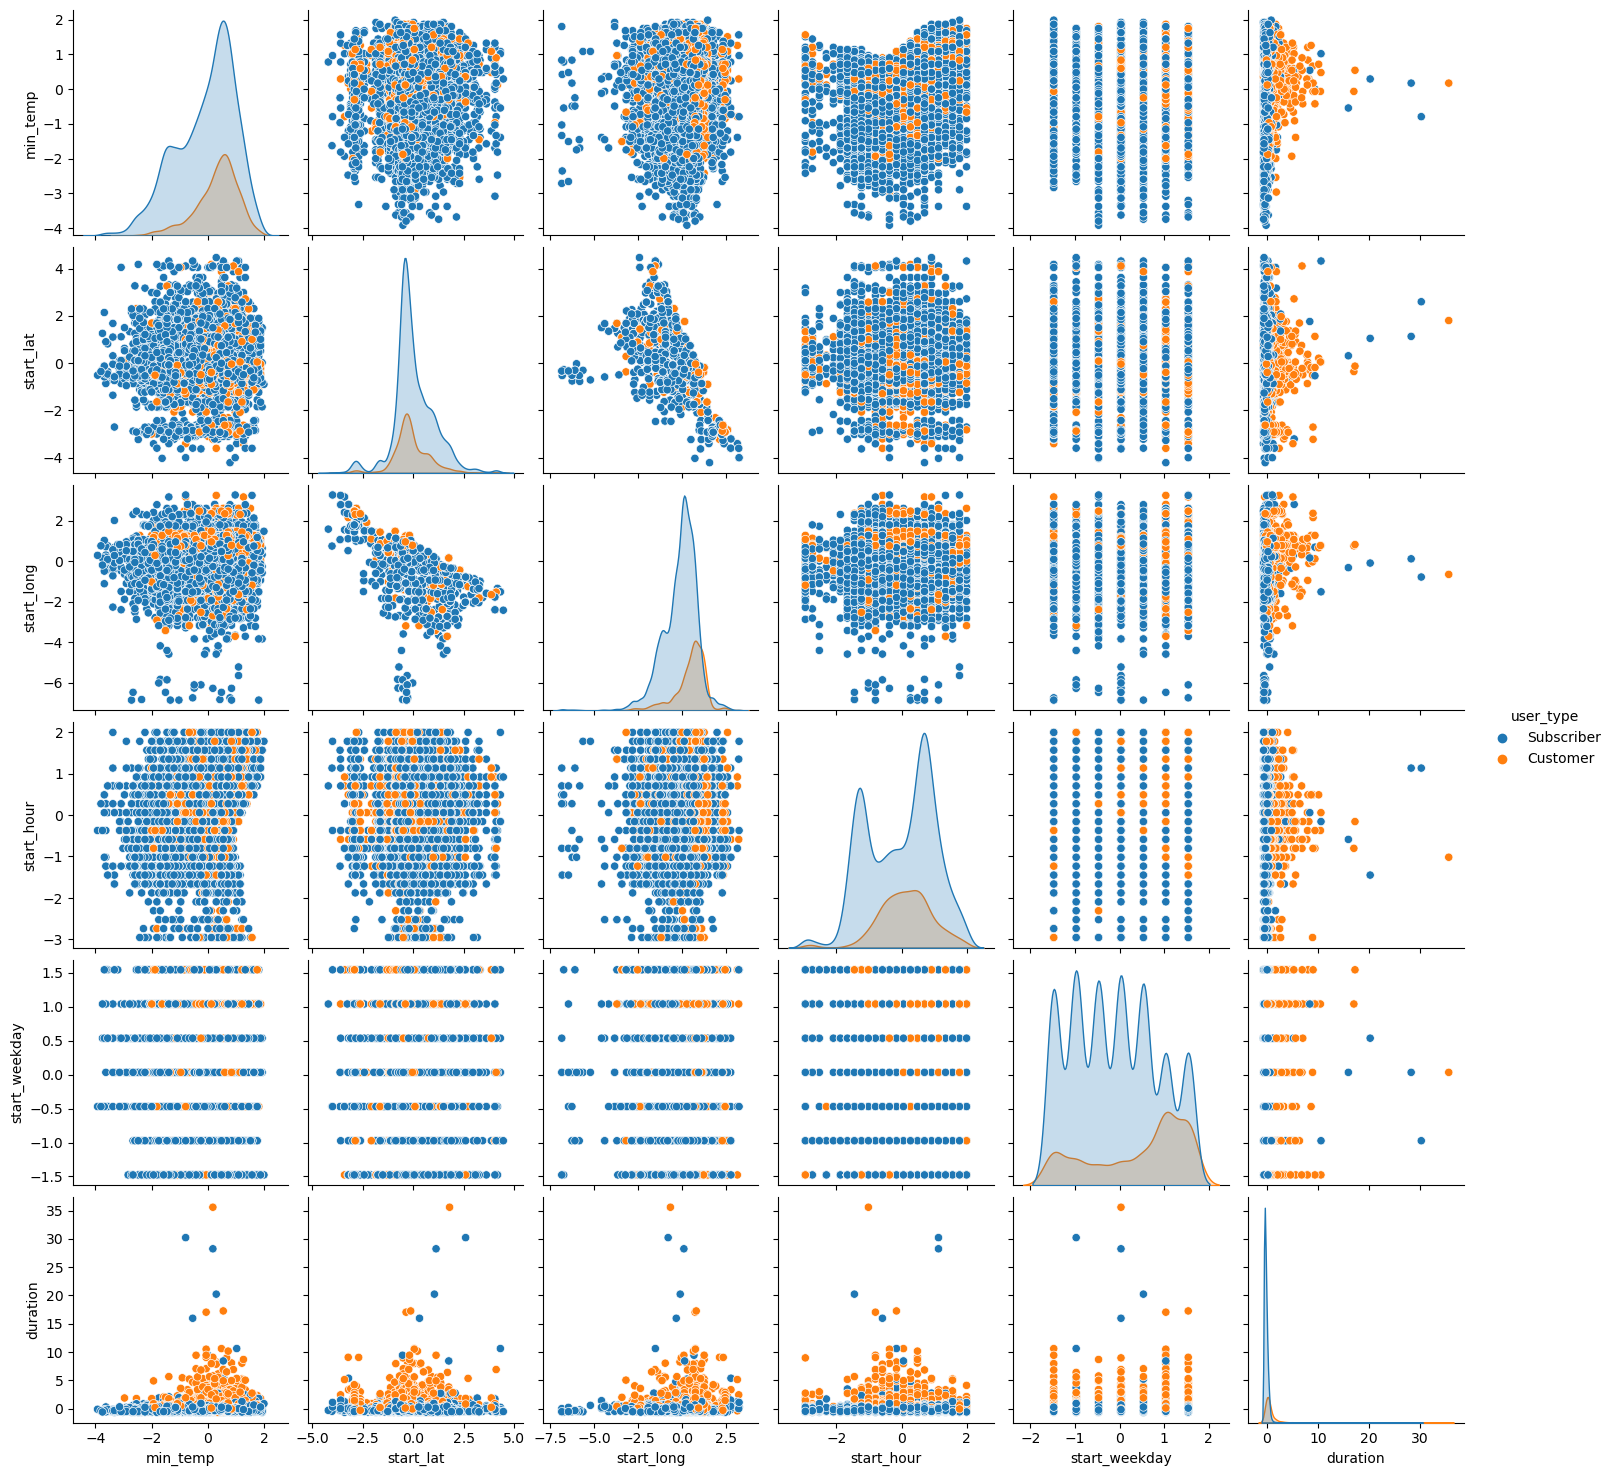

In [73]:
### Plotting with sample data set of 200 entries
sns.pairplot(data=bikesharing_transformed.sample(10000, random_state=200)[continuous_cols + ordinal_cols + ["user_type"]], hue='user_type')

In [74]:
### New data frame with sample of 200 data points to conduct clustering
bikesharing_sample = bikesharing_transformed.sample(10000, random_state=200)[continuous_cols + ordinal_cols]

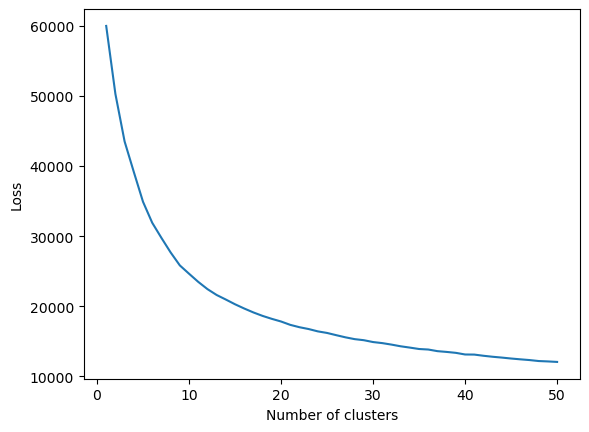

In [75]:
### Running kmeans with k_max = 50
k_max = 50
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(bikesharing_sample)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

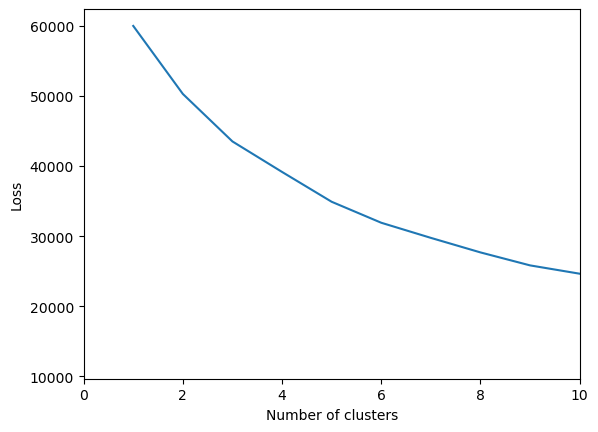

In [76]:
### Zooming in
plt.plot(clusters, losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [77]:
### The optimal amount of clusters lies between 5 and 6, which is why we are starting with five 
five_means = KMeans(n_clusters=5)
five_means.fit(bikesharing_sample)
five_means.predict(bikesharing_sample)

array([0, 0, 4, ..., 4, 2, 0], dtype=int32)

In [69]:
## Add assigned clusters as a new column -> not necessary 
## five_means.labels_
## bikesharing_sample['categories'] = five_means.labels_
## bikesharing_sample.head()

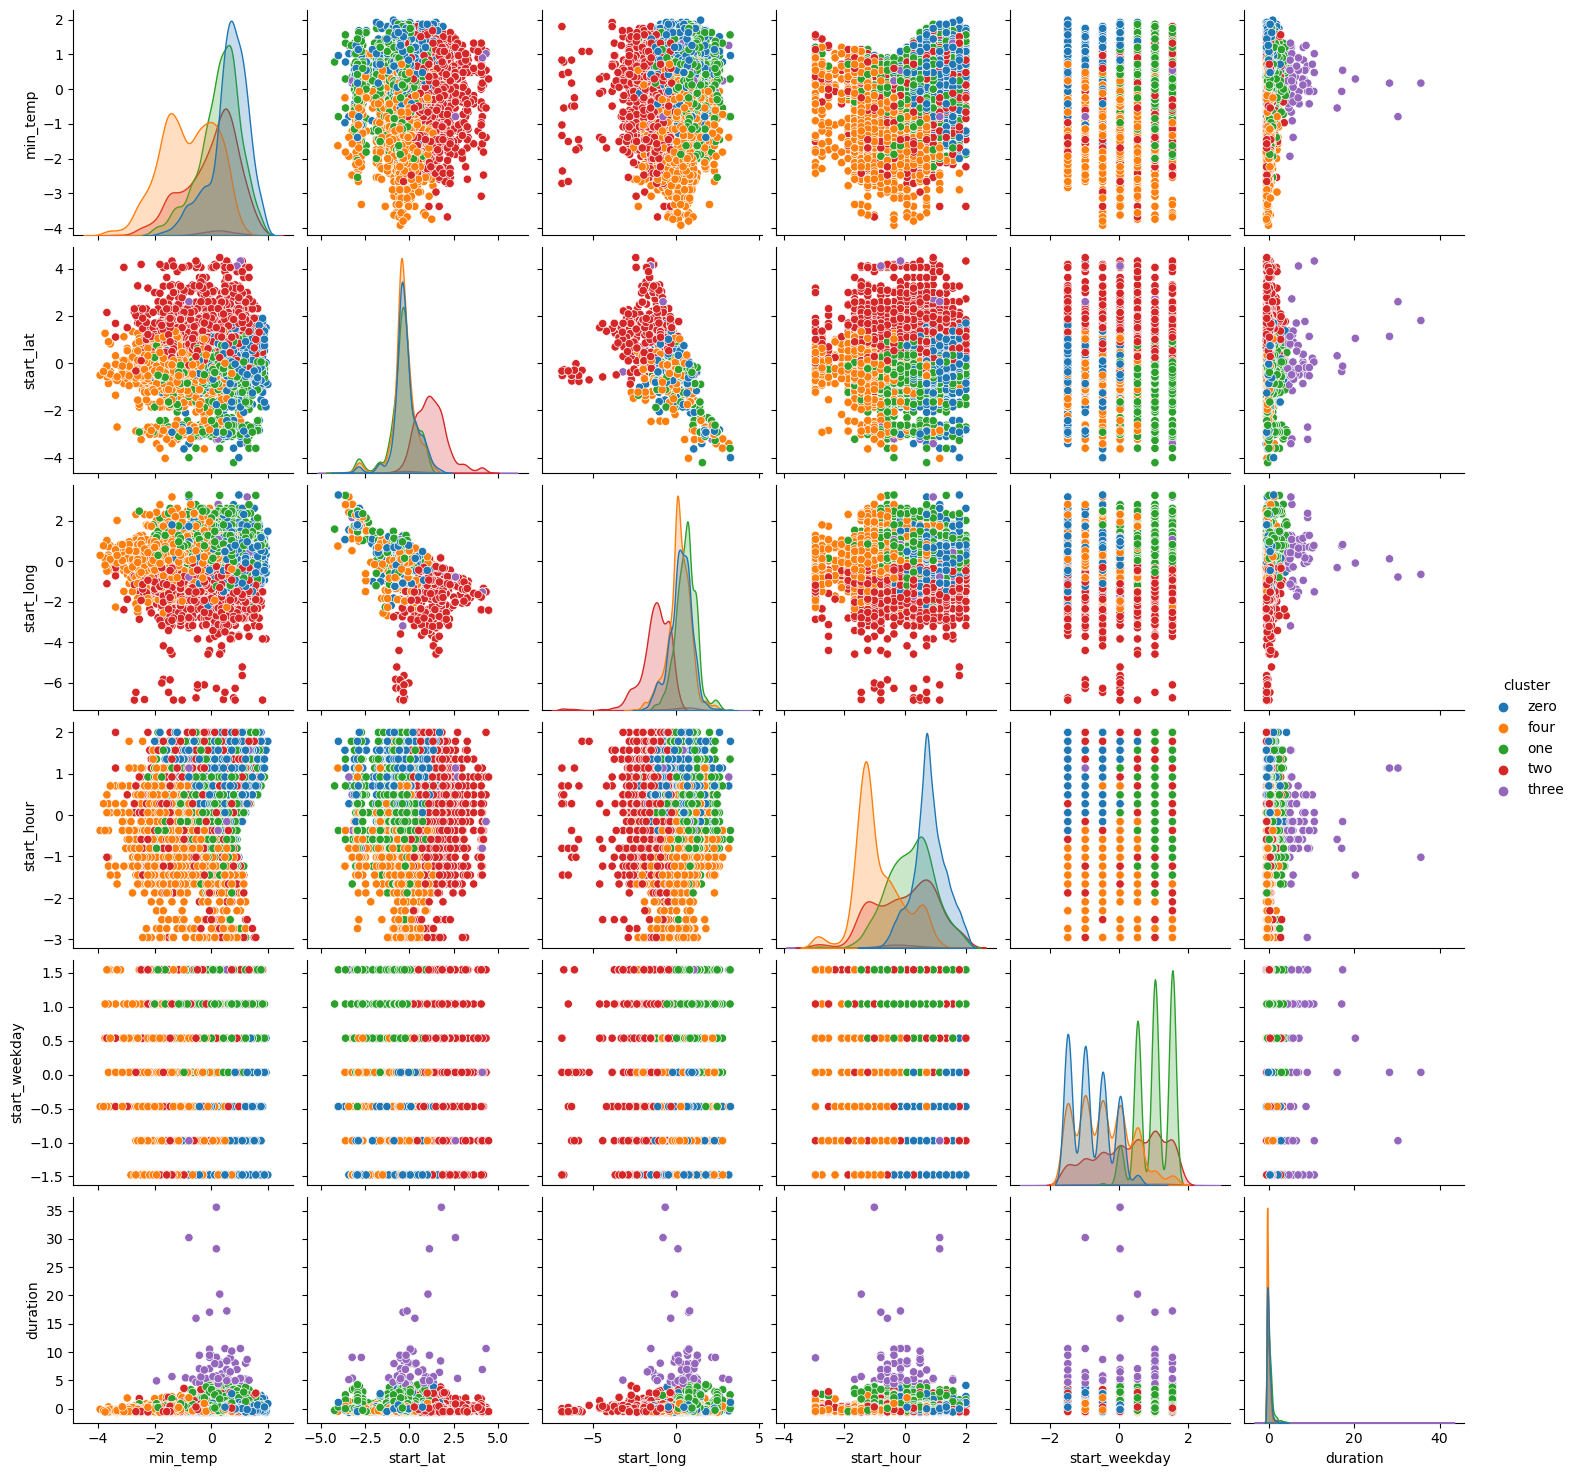

In [78]:
numbers = ["zero", "one", "two", "three", "four"]

bikesharing_sample["cluster"] = five_means.predict(bikesharing_sample)
bikesharing_sample["cluster"] = bikesharing_sample["cluster"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_sample, hue="cluster")

In [79]:
bikesharing_sample.sort_index(inplace=True)
bikesharing_sample

min_temp  start_lat  start_long  start_hour  start_weekday  duration  \
0     0.659951   0.571256   -1.530950    0.273472       1.038560  0.187546   
1    -0.490801  -0.753483   -1.353755    0.703933       1.541617 -0.350452   
2    -1.576416  -0.459636    0.085875    1.564856       1.541617 -0.497654   
3    -1.511279   1.699753   -0.543769   -1.663604      -1.476723 -0.529785   
4     1.083340  -2.817112    2.599774    1.995317      -1.476723  2.134798   
...        ...        ...         ...         ...            ...       ...   
9995 -0.425664  -1.227860   -0.204007   -2.954988       1.038560 -0.435635   
9996  0.475396  -0.488380    0.755563    0.273472       1.541617 -0.271994   
9997 -0.121692  -0.329821    0.672826   -0.587451       0.535504 -0.619451   
9998  0.355978  -0.292700    0.232283    0.273472      -0.973666 -0.455810   
9999  0.117143   0.618471   -0.097273   -0.587451       1.541617 -0.274983   

     cluster  
0        two  
1        one  
2        one  
3       four  
4       zero  
...      ...  
9995    four  
9996     one  
9997     one  
9998    zero  
9999     one  

[10000 rows x 7 columns]

In [85]:
bikesharing_relevant["cluster"] = bikesharing_sample["cluster"]
bikesharing_relevant
bikesharing_relevant.groupby('cluster').count()

user_type  start_hour  start_weekday  min_temp  precip  duration  \
cluster                                                                     
four          2764        2764           2764      2764    2764      2764   
one           2565        2565           2565      2565    2565      2565   
three           66          66             66        66      66        66   
two           2088        2088           2088      2088    2088      2088   
zero          2517        2517           2517      2517    2517      2517   

         start_lat  start_long  
cluster                         
four          2764        2764  
one           2565        2565  
three           66          66  
two           2088        2088  
zero          2517        2517

# Interpreting the clustering outcome

Cluster "zero" (blue): 
- high temperature
- afternoon/early evening
- mostly mon/tue
- duration appr. 14min
- geo location TBD


In [86]:
### Looking at cluster "zero"

bikesharing_relevant[bikesharing_relevant.values  == "zero"].describe()

start_hour  start_weekday     min_temp       precip     duration  \
count  2517.000000    2517.000000  2517.000000  2517.000000  2517.000000   
mean     17.357171       1.341677    22.372626     0.027811   849.675407   
std       2.478196       1.143197     6.169095     0.164463   652.521960   
min       8.000000       0.000000    -1.700000     0.000000    60.000000   
25%      16.000000       0.000000    19.400000     0.000000   412.000000   
50%      17.000000       1.000000    23.300000     0.000000   702.000000   
75%      19.000000       2.000000    26.700000     0.000000  1080.000000   
max      23.000000       5.000000    35.000000     1.000000  6434.000000   

         start_lat   start_long  
count  2517.000000  2517.000000  
mean     41.890055   -87.635697  
std       0.025835     0.015900  
min      41.751820   -87.693374  
25%      41.879472   -87.643909  
50%      41.886875   -87.634830  
75%      41.900960   -87.624649  
max      41.971600   -87.565211

Cluster "one" (green):
- noon/early afternoon
- longer trips (19.5min)
- mainly fri/sat/sun
- high temperature
- geo location: TBD

In [82]:
### Looking at cluster "one"
bikesharing_relevant[bikesharing_sample.values  == "one"].describe()

start_hour  start_weekday     min_temp       precip     duration  \
count  2565.000000    2565.000000  2565.000000  2565.000000  2565.000000   
mean     14.624172       4.945029    19.330448     0.020663  1172.633138   
std       3.561785       0.939937     6.758986     0.142280   978.307916   
min       0.000000       2.000000    -6.700000     0.000000    60.000000   
25%      12.000000       4.000000    15.600000     0.000000   538.000000   
50%      15.000000       5.000000    20.000000     0.000000   923.000000   
75%      17.000000       6.000000    23.900000     0.000000  1478.000000   
max      23.000000       6.000000    33.900000     1.000000  6589.000000   

         start_lat   start_long  
count  2565.000000  2565.000000  
mean     41.884426   -87.628012  
std       0.029012     0.014969  
min      41.744053   -87.695140  
25%      41.875885   -87.636794  
50%      41.886021   -87.626804  
75%      41.898203   -87.618835  
max      41.940775   -87.565211

Cluster "two" (red):
- shorter trips (13...)
- during week

In [87]:
### Looking at cluster "two"
bikesharing_relevant[bikesharing_relevant.values  == "two"].describe()

start_hour  start_weekday     min_temp       precip     duration  \
count  2088.000000    2088.000000  2088.000000  2088.000000  2088.000000   
mean     13.763889       3.540709    16.632375     0.041667   830.601054   
std       4.717643       1.871090     8.658703     0.199874   689.725450   
min       0.000000       0.000000   -17.200000     0.000000    60.000000   
25%      10.000000       2.000000    11.100000     0.000000   359.000000   
50%      14.000000       4.000000    18.300000     0.000000   660.000000   
75%      17.000000       5.000000    22.800000     0.000000  1093.000000   
max      23.000000       6.000000    34.400000     1.000000  6335.000000   

         start_lat   start_long  
count  2088.000000  2088.000000  
mean     41.944239   -87.671607  
std       0.032654     0.022393  
min      41.844475   -87.802870  
25%      41.920771   -87.679259  
50%      41.940775   -87.668570  
75%      41.962391   -87.654640  
max      42.063598   -87.636250

Cluster "three" (purple):
- morning til early afternoon
- long trips (over three hours)
- mostly weekends

In [89]:
### Looking at cluster "three"
bikesharing_relevant[bikesharing_relevant.values  == "three"].describe()

start_hour  start_weekday   min_temp     precip      duration  \
count   66.000000      66.000000  66.000000  66.000000     66.000000   
mean    12.954545       3.393939  18.609091   0.015152  12052.393939   
std      3.492550       2.111352   5.749695   0.123091   8096.571667   
min      0.000000       0.000000  -1.100000   0.000000   6816.000000   
25%     11.000000       1.250000  15.725000   0.000000   7711.750000   
50%     13.000000       4.000000  18.900000   0.000000   8908.000000   
75%     15.000000       5.000000  22.075000   0.000000  12848.000000   
max     21.000000       6.000000  28.900000   1.000000  48582.000000   

       start_lat  start_long  
count  66.000000   66.000000  
mean   41.903238  -87.633967  
std     0.050351    0.024948  
min    41.773643  -87.716866  
25%    41.880958  -87.645200  
50%    41.893363  -87.629323  
75%    41.929367  -87.622941  
max    42.058239  -87.567514

Cluster "four" (orange)  
morning trips
- low temperatures -> winter?
- duration: around 11min

In [90]:
### Looking at cluster "four"
bikesharing_relevant[bikesharing_relevant.values  == "four"].describe()

start_hour  start_weekday     min_temp       precip     duration  \
count  2764.000000    2764.000000  2764.000000  2764.000000  2764.000000   
mean      9.587916       2.053907     9.174530     0.076339   656.257236   
std       3.709484       1.555694     8.952946     0.265587   456.250427   
min       0.000000       0.000000   -19.400000     0.000000    60.000000   
25%       7.000000       1.000000     2.800000     0.000000   346.750000   
50%       8.000000       2.000000     9.400000     0.000000   539.000000   
75%      12.000000       3.000000    16.700000     0.000000   840.000000   
max      22.000000       6.000000    27.800000     1.000000  4031.000000   

         start_lat   start_long  
count  2764.000000  2764.000000  
mean     41.886503   -87.638013  
std       0.026232     0.016504  
min      41.750794   -87.705073  
25%      41.877945   -87.645368  
50%      41.884730   -87.638506  
75%      41.898418   -87.627734  
max      41.967968   -87.567514

## Principal Component Analysis (PCA)

In [93]:
### Running Principal Component Analysis
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(bikesharing_sample)
pca.components_

array([[ 0.18601305, -0.60975802,  0.58559251,  0.49103244, -0.03515444,
         0.09125248]])

In [75]:
pca.explained_variance_ratio_[0]

0.32048419992767246

In [76]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(bikesharing_sample)
sum(pca.explained_variance_ratio_)

0.7489764048057757

In [77]:
bikesharing_pca = pd.DataFrame(X_pca, columns=["First PC", "Second PC", "Third PC"], index=bikesharing_sample.index)
bikesharing_pca.head()

First PC  Second PC  Third PC
1818173 -0.953009   1.496828  0.214473
3345318 -0.097204   1.179182 -1.058249
41418    0.785796   0.920700 -1.698792
3589945 -2.387052  -2.014852  0.153903
2375757  4.750948  -0.970025  0.901876

c:\Users\annal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


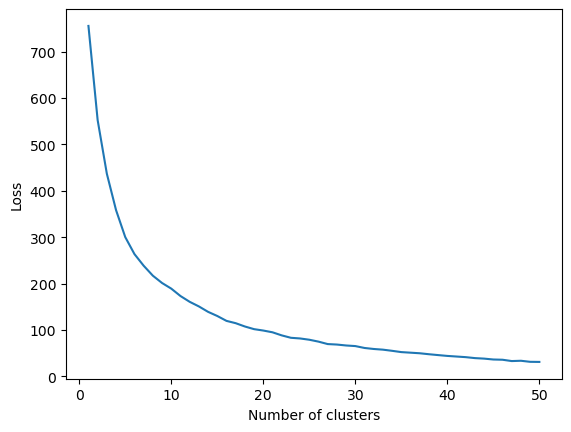

In [78]:
pca_clusters = []
pca_losses = []

for i in range(k_max):
    model = KMeans(n_clusters=i+1)
    model.fit(X_pca)
    pca_clusters.append(i+1)
    pca_losses.append(model.inertia_)
    
plt.plot(pca_clusters, pca_losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

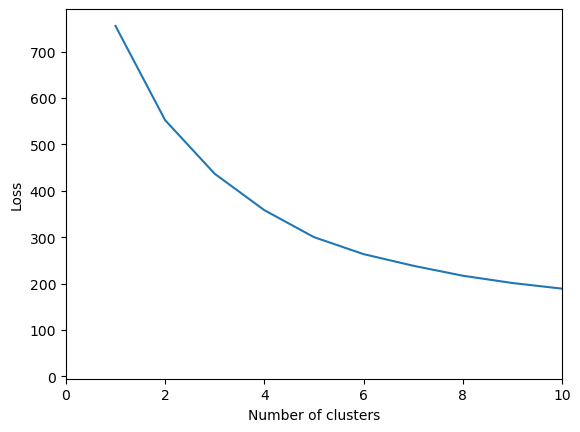

In [79]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

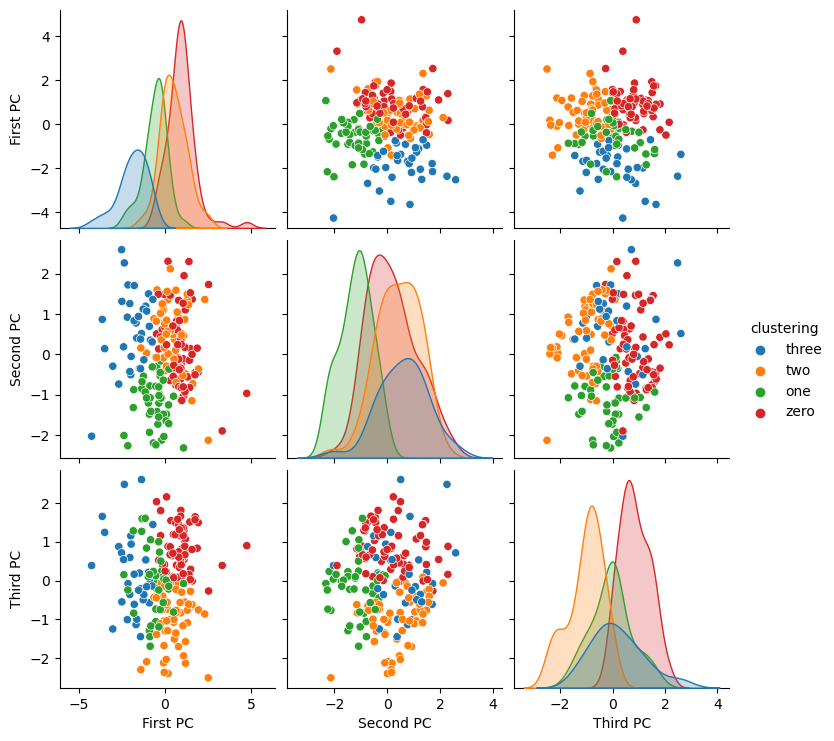

In [80]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bikesharing_pca)
kmeans.predict(bikesharing_pca)
numbers = ["zero", "one", "two", "three"]
bikesharing_pca["clustering"] = kmeans.predict(bikesharing_pca)
bikesharing_pca["clustering"] = bikesharing_pca["clustering"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_pca, hue="clustering")

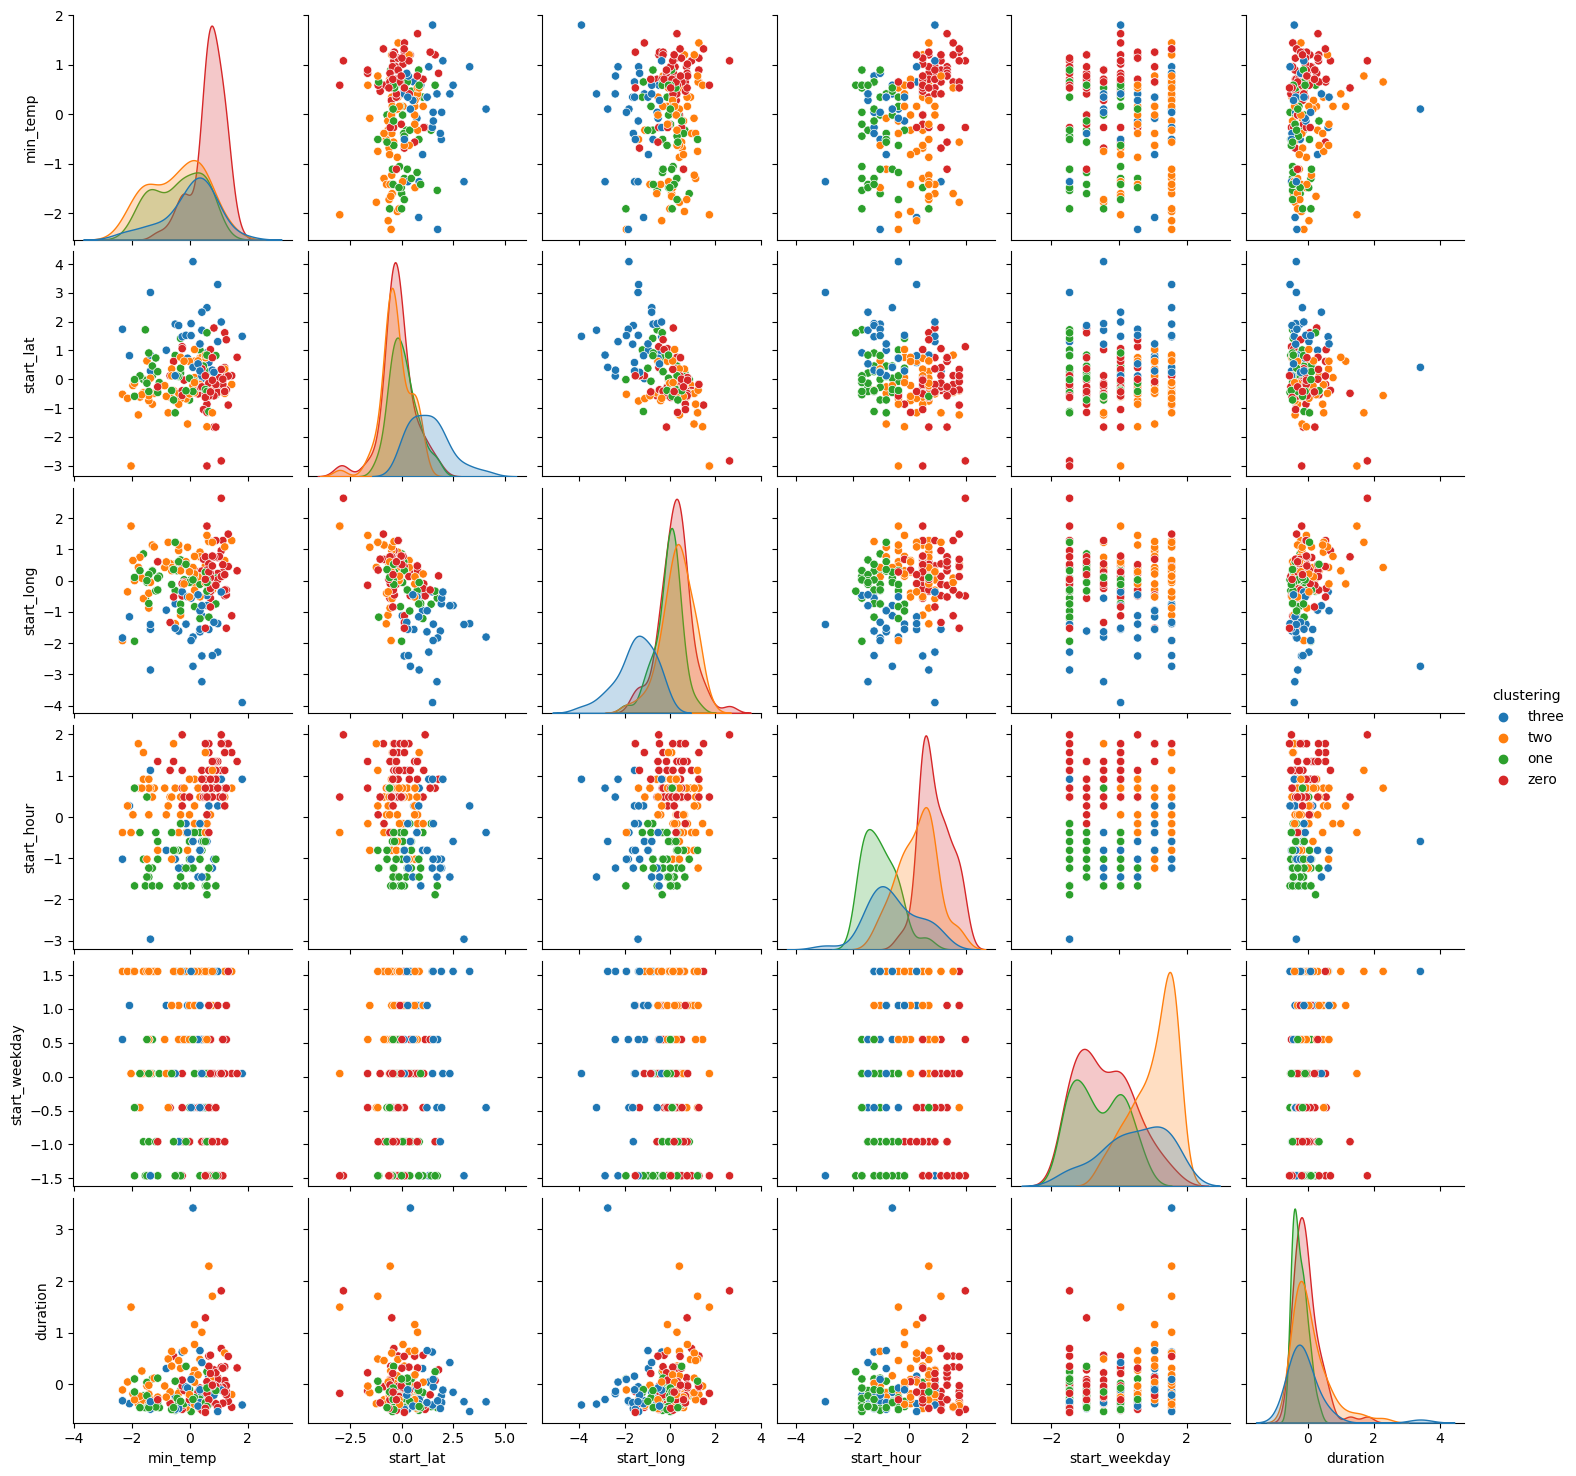

In [81]:
bikesharing_sample["clustering"] = bikesharing_pca["clustering"]
sns.pairplot(data=bikesharing_sample, hue="clustering")

In [82]:
def interpret(x):
    if x == "zero":
        x = "Leisure Trips"
    elif x == "one":
        x = "Afternoon Trip Warm"
    elif x == "two":
        x = "Afternoon Trip Cold"
    else:
        x = "Morning Trip"
    return x
        
bikesharing_sample["clustering"] = bikesharing_sample["clustering"].apply(lambda x: interpret(x))

In [83]:
bikesharing_sample

min_temp  start_lat  start_long  start_hour  start_weekday  duration  \
1818173  0.653736   0.576894   -1.564364    0.267073       1.050558  0.154907   
3345318 -0.508422  -0.758782   -1.384470    0.697928       1.553288 -0.301979   
41418   -1.604797  -0.462509    0.077081    1.559638       1.553288 -0.426988   
3589945 -1.539015   1.714708   -0.562150   -1.671776      -1.463095 -0.454274   
2375757  1.081322  -2.839447    2.629260    1.990494      -1.463095  1.808582   
...           ...        ...         ...         ...            ...       ...   
906271   0.039765   1.514188   -1.919428   -1.025493       1.553288  0.092720   
3678622 -0.563241  -0.722284    0.350397   -0.810065      -0.960364 -0.454274   
2553516  0.708554  -0.442290   -0.845611    0.913356       0.045097  0.207576   
2606609  0.774337  -1.169005    1.220464    1.128783       1.553288  1.703879   
3088736  1.201923  -0.430209    0.185860    0.267073      -0.960364 -0.154125   

                  clustering  
1818173         Morning Trip  
3345318  Afternoon Trip Cold  
41418    Afternoon Trip Cold  
3589945  Afternoon Trip Warm  
2375757        Leisure Trips  
...                      ...  
906271          Morning Trip  
3678622  Afternoon Trip Warm  
2553516        Leisure Trips  
2606609  Afternoon Trip Cold  
3088736        Leisure Trips  

[200 rows x 7 columns]

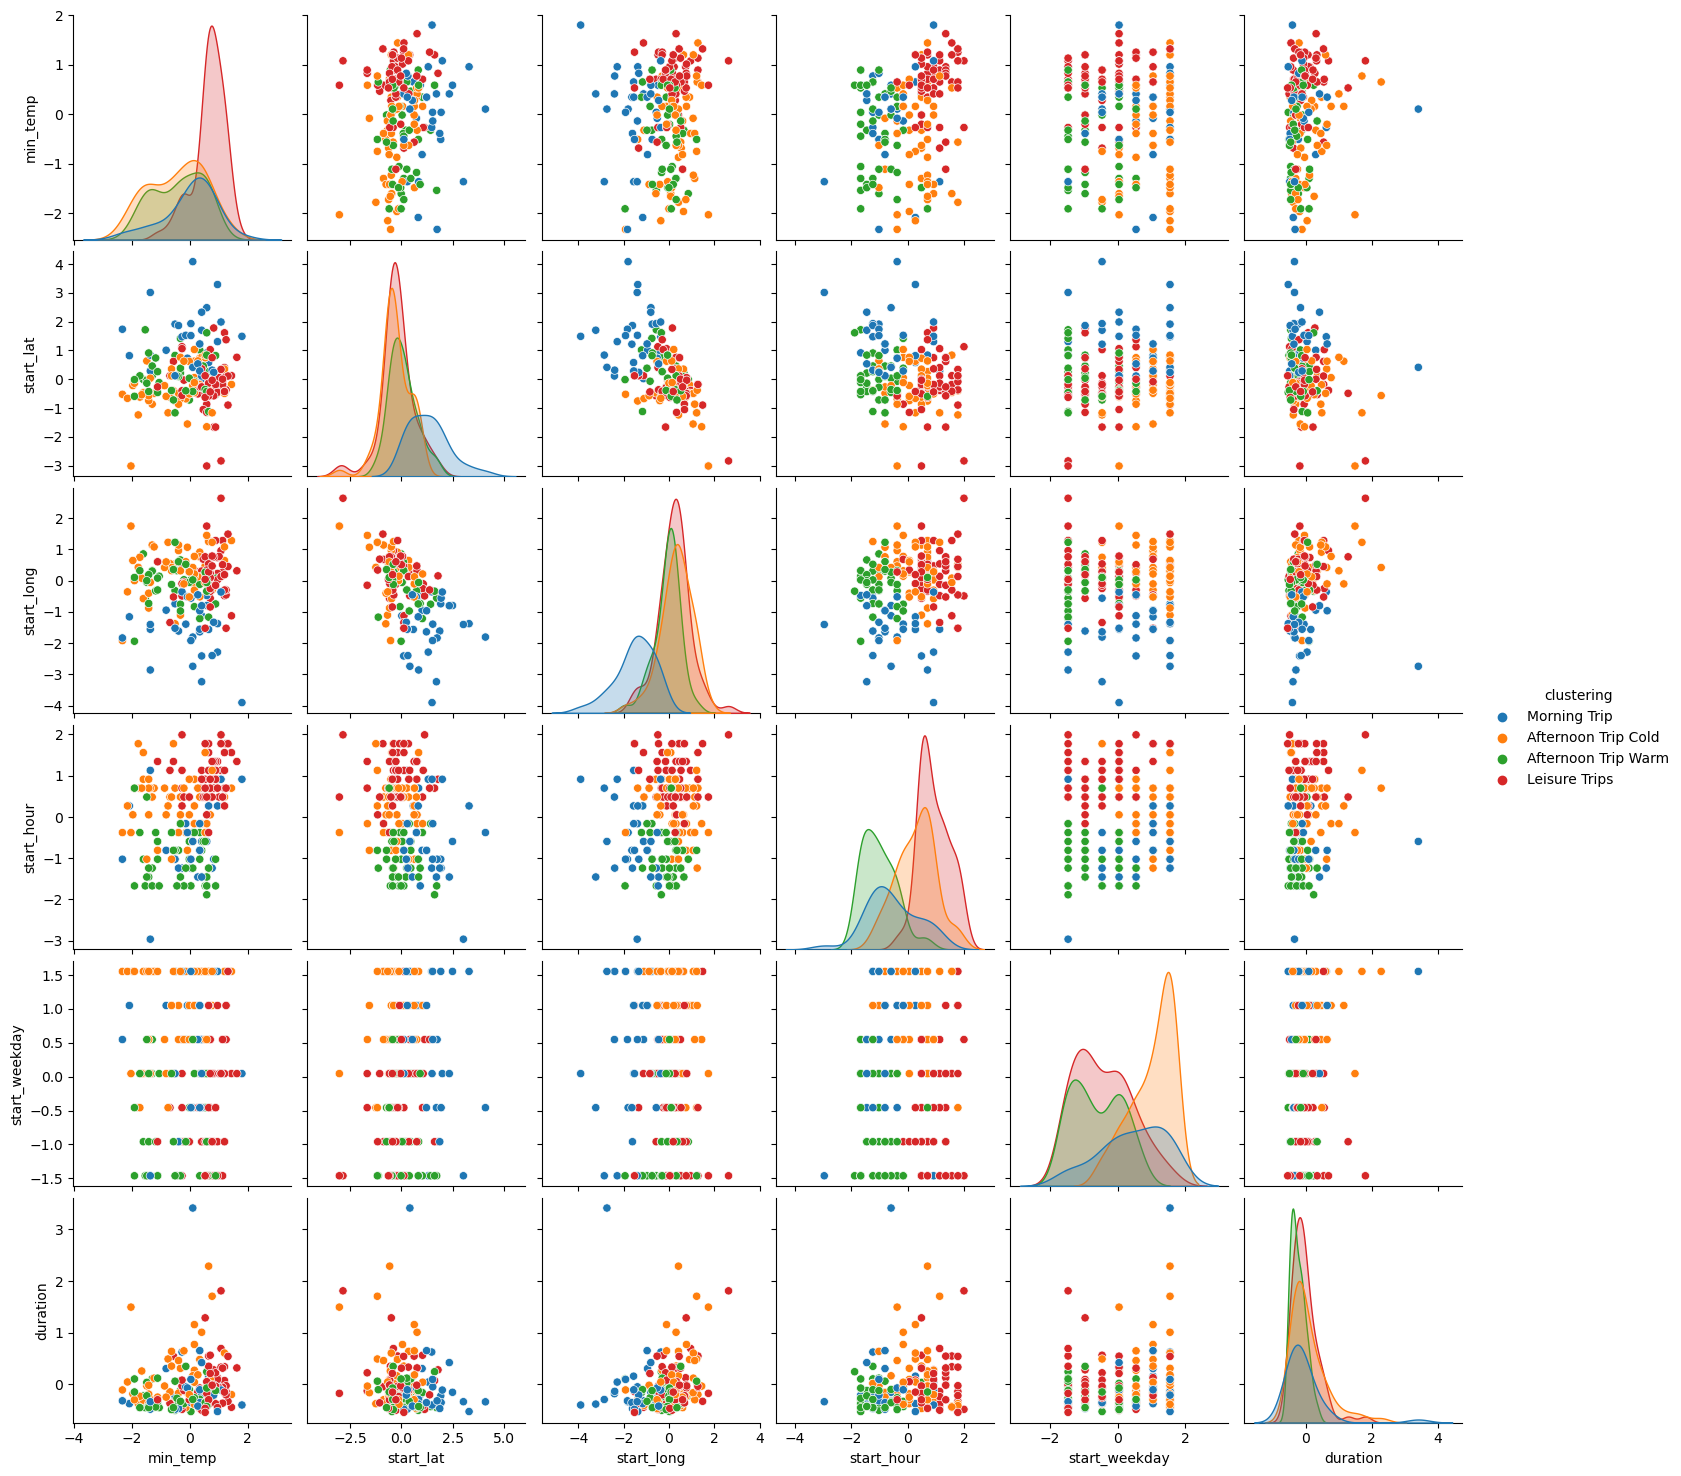

In [84]:
sns.pairplot(data=bikesharing_sample, hue="clustering")